In [29]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Functions

In [17]:
def json_read(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return data

In [19]:
def graph_plotting(distances, weight_selection=range(5)):

    G = nx.Graph()
    for _, row in distances.iterrows():
        actor1 = row[0]
        actor2 = row[2]
        weight = row[4]
        G.add_node(actor1)
        G.add_node(actor2)
        G.add_edge(actor1, actor2, weight=weight)

    pos = nx.circular_layout(G, scale=3)

    edge_selection = [(edge[0], edge[1]) for edge in G.edges(data='weight') if edge[2] in weight_selection]
    edge_labels = {(edge[0], edge[1]): edge[2] for edge in G.edges(data='weight') if edge[2] in weight_selection}
    edge_weights = [edge[2] for edge in G.edges(data='weight') if edge[2] in weight_selection]
    edge_colors = {1: '#90EE90', 2: '#ADD8E6', 3: '#FFB6C1'} 

    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(G, pos, node_size=800, node_color='#ADD8E6')
    nx.draw_networkx_labels(G, pos, font_size=11)
    nx.draw_networkx_edges(
        G, pos, edgelist=edge_selection, edge_color=[edge_colors[weight] for weight in edge_weights], width=2)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    plt.axis('off')
    plt.show()


In [18]:
def path_plotting(actor_pair_triplets, start_actor, end_actor):
    G = nx.Graph()
    for triplet in actor_pair_triplets:
        actor_1, actor_2, movie = triplet
        G.add_node(actor_1[0]) if actor_1 else None
        G.add_node(actor_2[0]) if actor_2 else None
        G.add_edge(actor_1[0], actor_2[0], movie=movie[0]) if actor_1 and actor_2 else None

    shortest_path = nx.shortest_path(G, start_actor, end_actor)

    subgraph_nodes = set(shortest_path)
    subgraph_edges = [(edge[0], edge[1]) for edge in G.edges() if edge[0] in subgraph_nodes and edge[1] in subgraph_nodes]
    subgraph = G.subgraph(subgraph_nodes)

    pos = nx.circular_layout(subgraph, scale=3)

    edge_labels = {(edge[0], edge[1]): edge[2] for edge in subgraph.edges(data='movie')}

    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(subgraph, pos, node_size=800, node_color='#ADD8E6')
    nx.draw_networkx_labels(subgraph, pos, font_size=11)
    nx.draw_networkx_edges(subgraph, pos, edgelist=subgraph_edges, width=2)
    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels, font_size=10)

    plt.axis('off')
    plt.show()

# Graph plotting (distances and actor-movie paths)

The distance for each pair of actors was searched from both sides (argument `search_sides=2` was passed to the function). <br>
It was assumed that connection of each pair was undirected which resulted in search of 45 actor pairs. <br>
Applied limitations of number of actors (5) and movies (5) sometimes result in longer or distorted distances such as between Chris Hemsworth and Scarlett Johansson, who played in the same movie but managed to establish connection only trough Natalie Portman.

## 1. Plotting distances

In [8]:
distances = pd.read_csv('distances.csv')

In [22]:
distances.head()

,actor_1,url_1,actor_2,url_2,distance
0,Dwayne Johnson,https://www.imdb.com/name/nm0425005/,Chris Hemsworth,https://www.imdb.com/name/nm1165110/,2.0
1,Dwayne Johnson,https://www.imdb.com/name/nm0425005/,Robert Downey Jr.,https://www.imdb.com/name/nm0000375/,2.0
2,Dwayne Johnson,https://www.imdb.com/name/nm0425005/,Akshay Kumar,https://www.imdb.com/name/nm0474774/,inf
3,Dwayne Johnson,https://www.imdb.com/name/nm0425005/,Jackie Chan,https://www.imdb.com/name/nm0000329/,3.0
4,Dwayne Johnson,https://www.imdb.com/name/nm0425005/,Bradley Cooper,https://www.imdb.com/name/nm0177896/,2.0


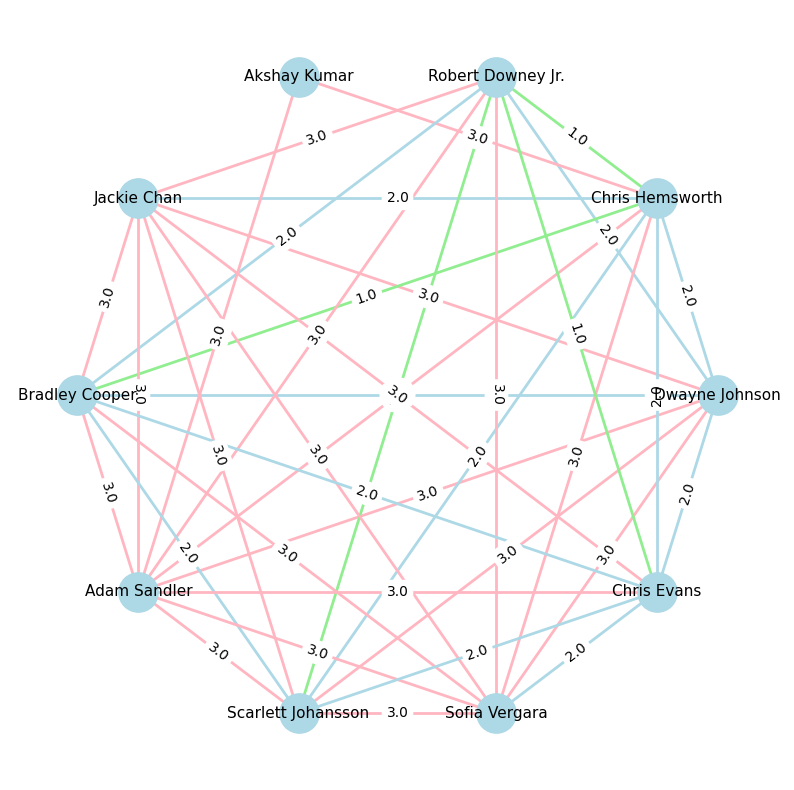

In [23]:
graph_plotting(distances)

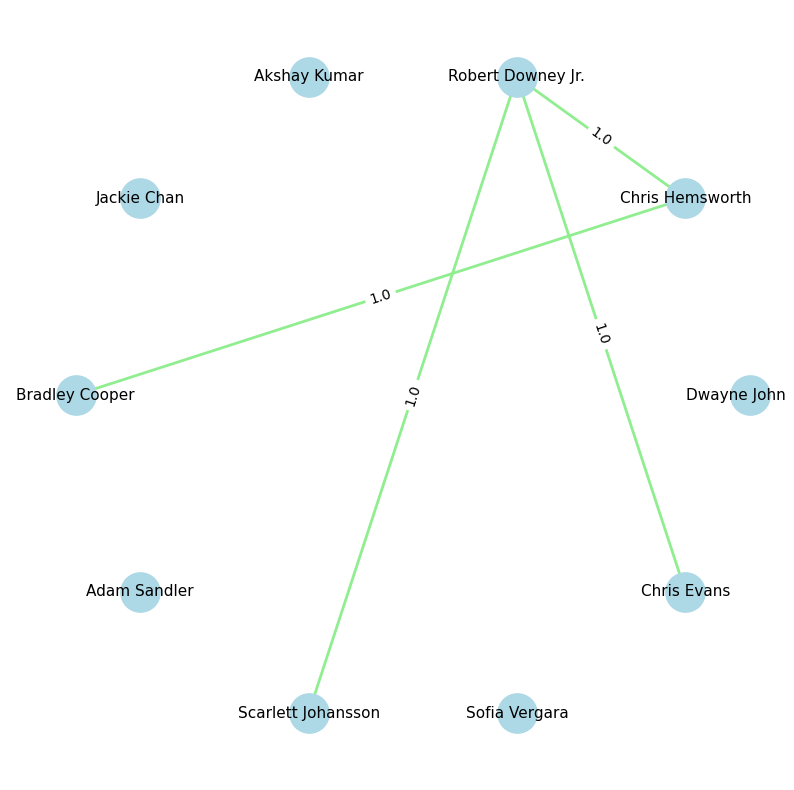

In [24]:
graph_plotting(distances, [1])

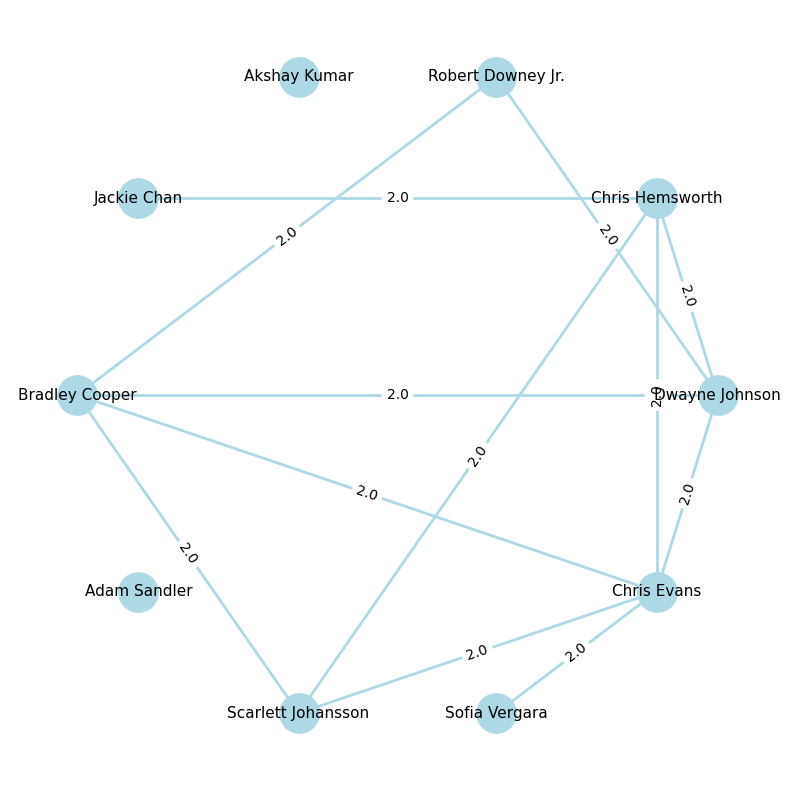

In [25]:
graph_plotting(distances, [2])

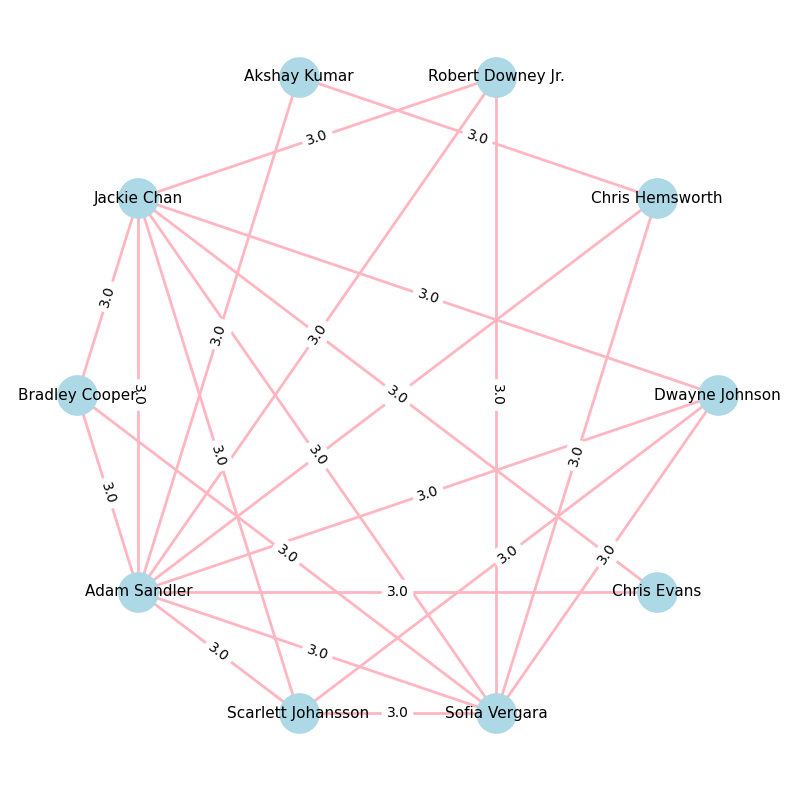

In [26]:
graph_plotting(distances, [3])

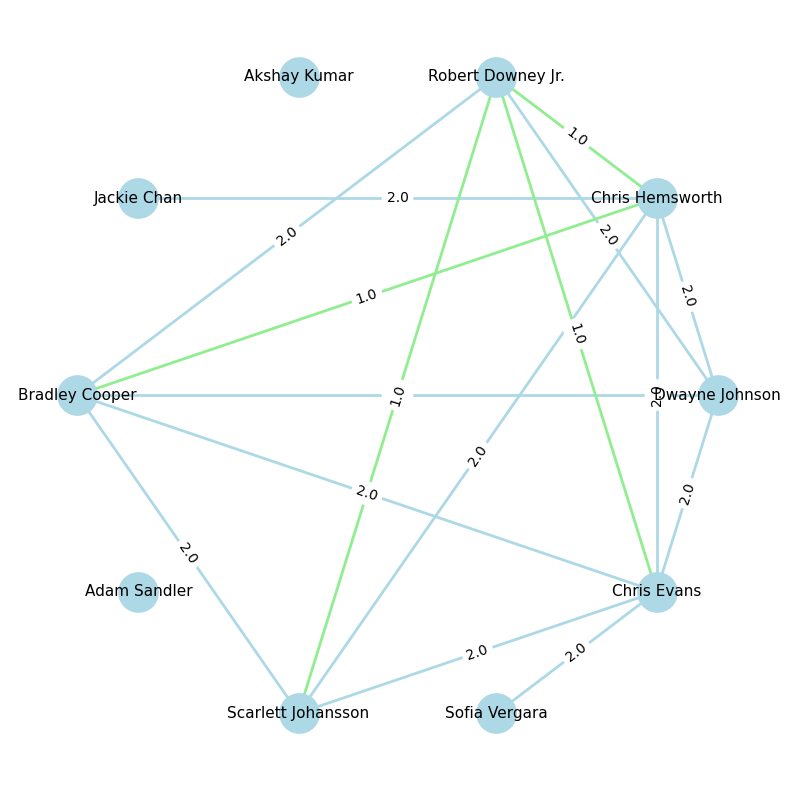

In [27]:
graph_plotting(distances, [1, 2])

## 2. Plotting actor-movie paths

In [33]:
triplets = json_read('triplets.json')
distances_connected = distances[distances.distance !=float('inf')]

In [34]:
all_triplets = [triplet for actor_pair_triplets in triplets for triplet in actor_pair_triplets]
distances_not_connected = distances[distances.distance == float('inf')]

Each connection triplet has the following format: [[actor_1_name, actor_1_url], [actor_2_name, actor_2_url], [movie_name, movie_url]]. <br>
A separate nested list of triplets was saved for every pair of actors taking into account the assumption of undirected connection. <br>
Therefore each path plot between actors with established connection is based stricltly on the correspondig list of triplets.

However, a flattened list af all collected triplets was used for plottong paths for actor pairs with no distance found under distance limit of 3. <br>
This paths are plotted at the beginning because there are only 7 actor pairs of this kind. <br>
Again, we can see some new distance information. For example, there is a connection of distance 3 between Robert Downey Jr. and Akshay Kumar, which was not found under set limits of number of actors (5) and movies (5), but appeared on a larger dataset from other searches.

### a. Paths for actor pairs with NO connection found

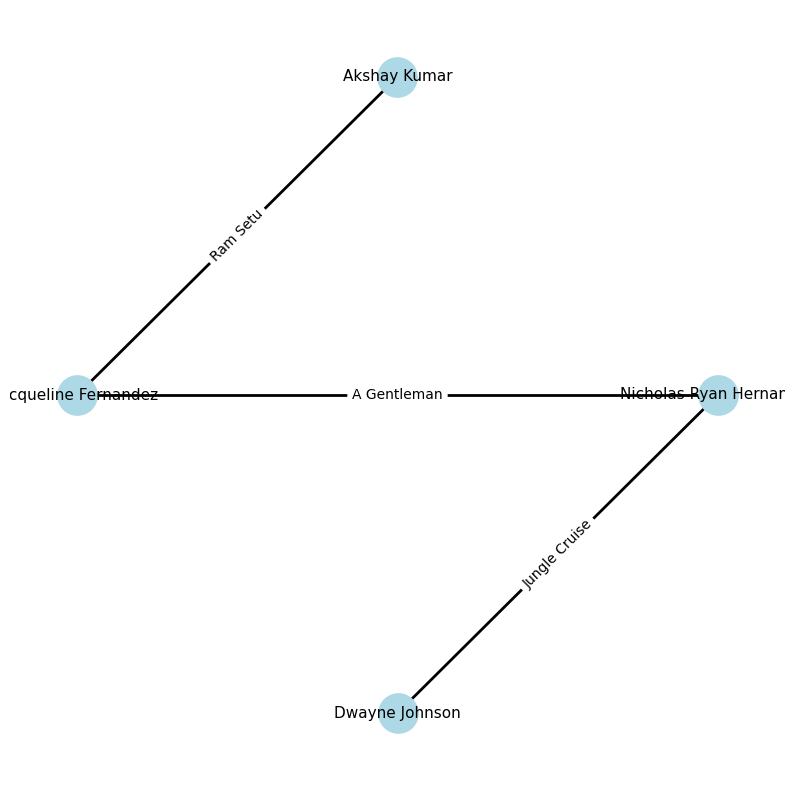

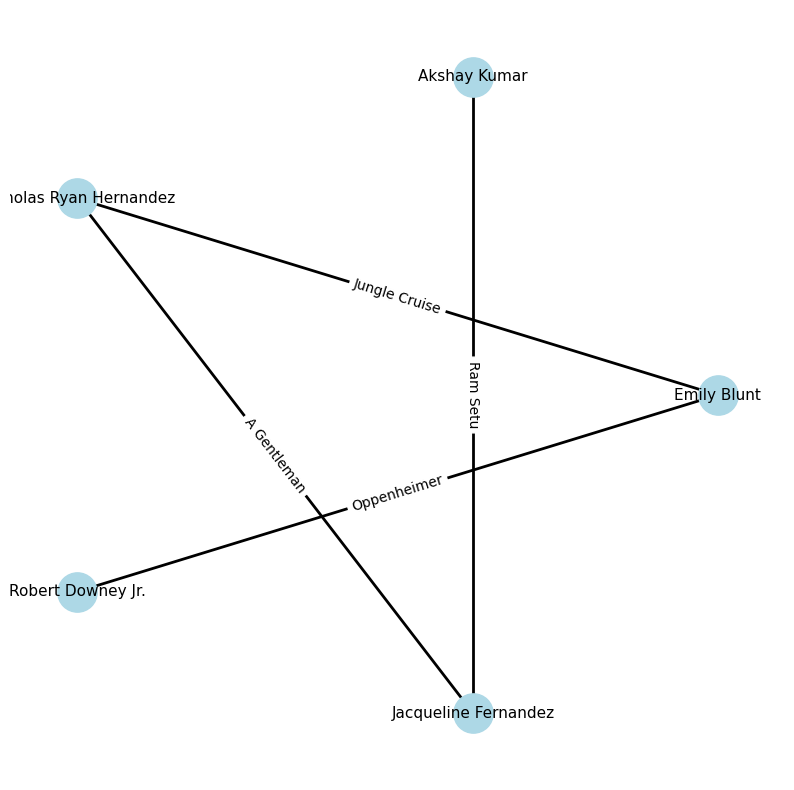

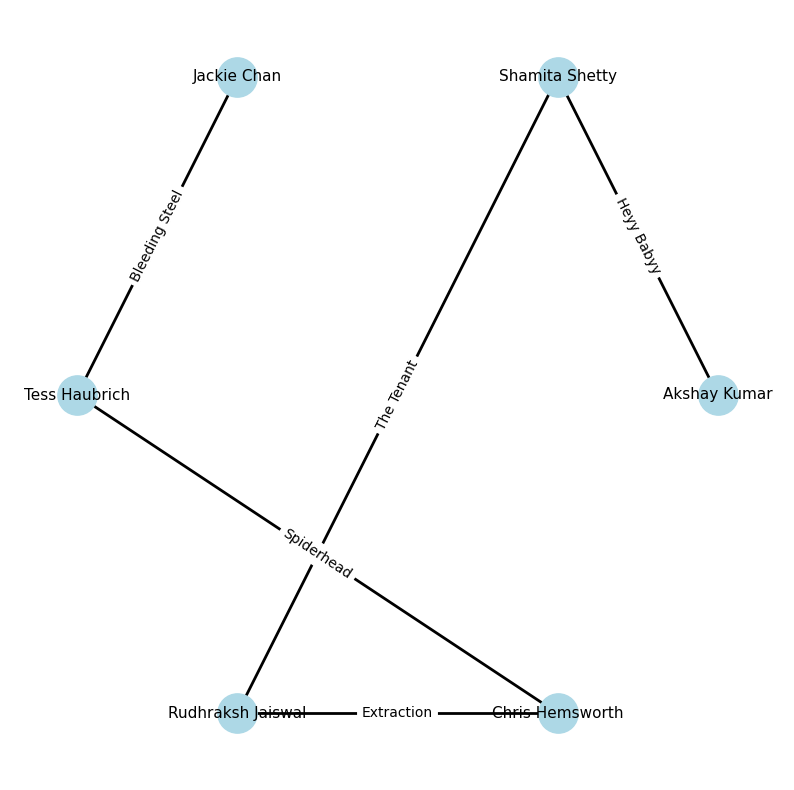

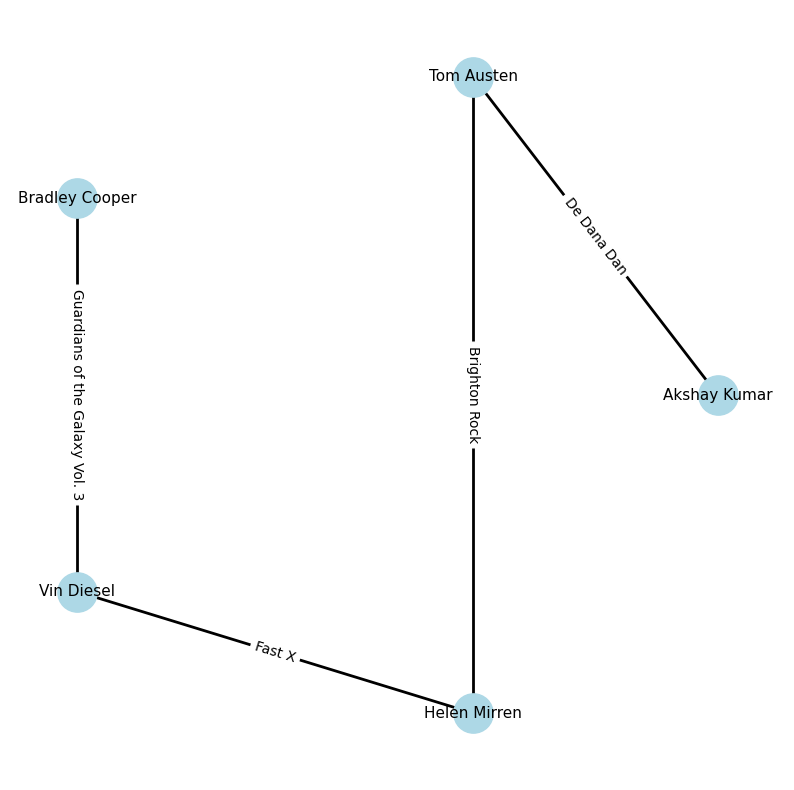

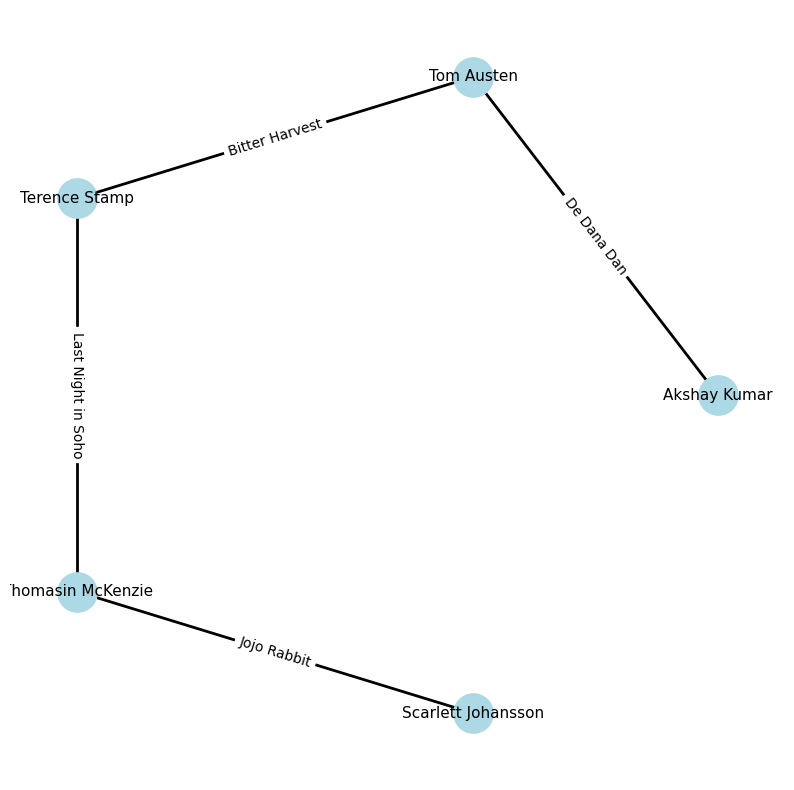

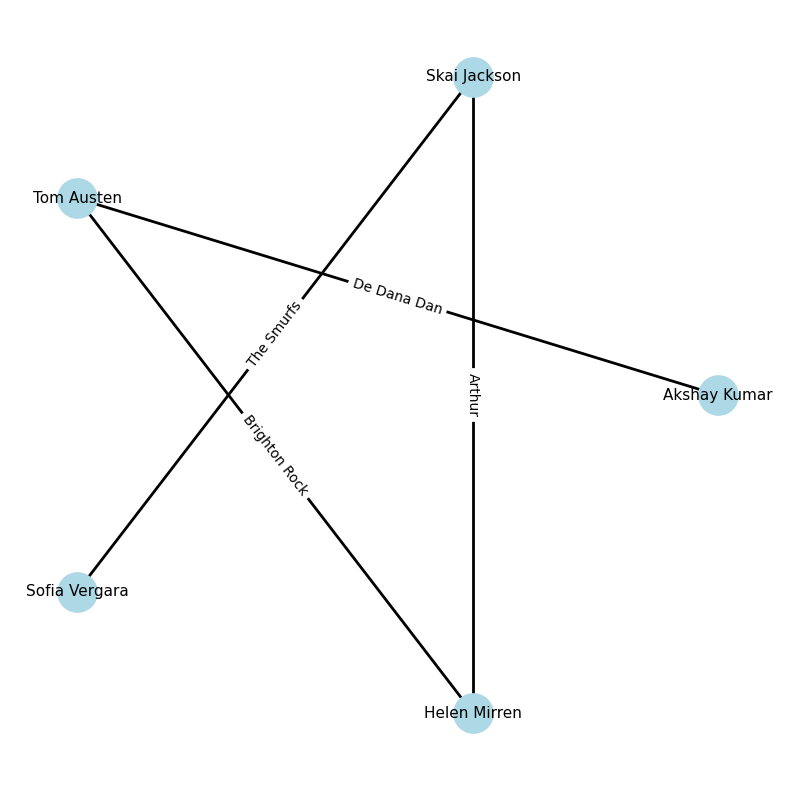

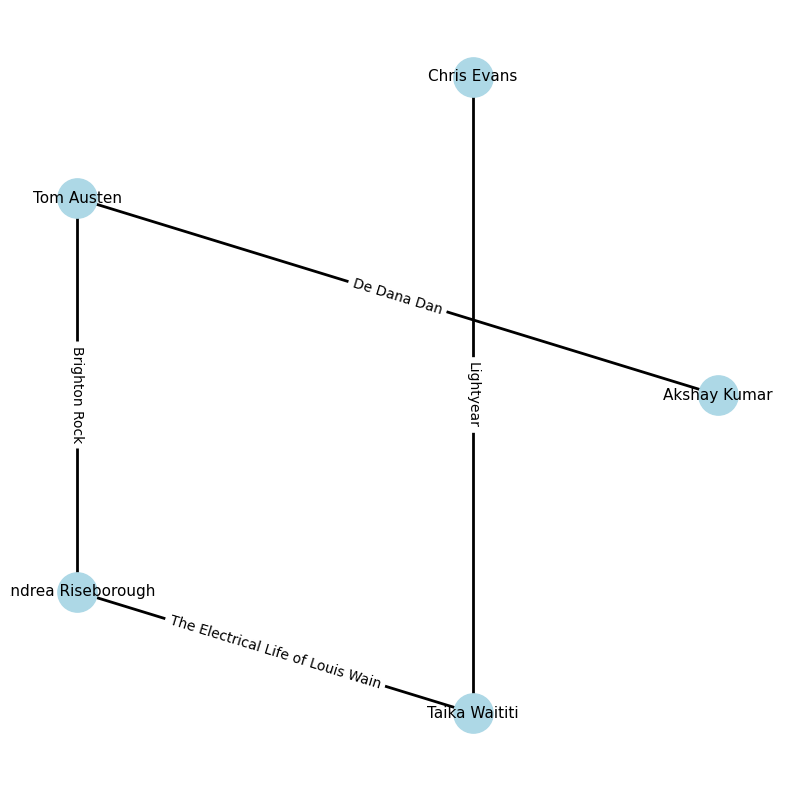

In [38]:
for _, row in distances_not_connected.iterrows():
    try:
        path_plotting(all_triplets, row[0], row[2])
    except:
        print(f'No connection for {row[0]} and {row[2]}')

### a. Paths for actor pairs with found connections

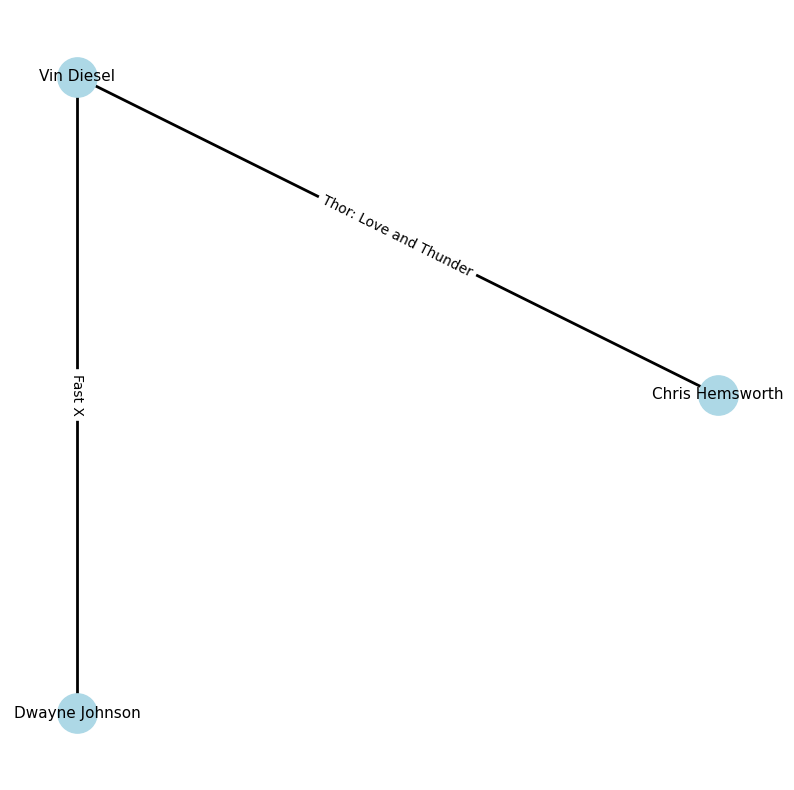

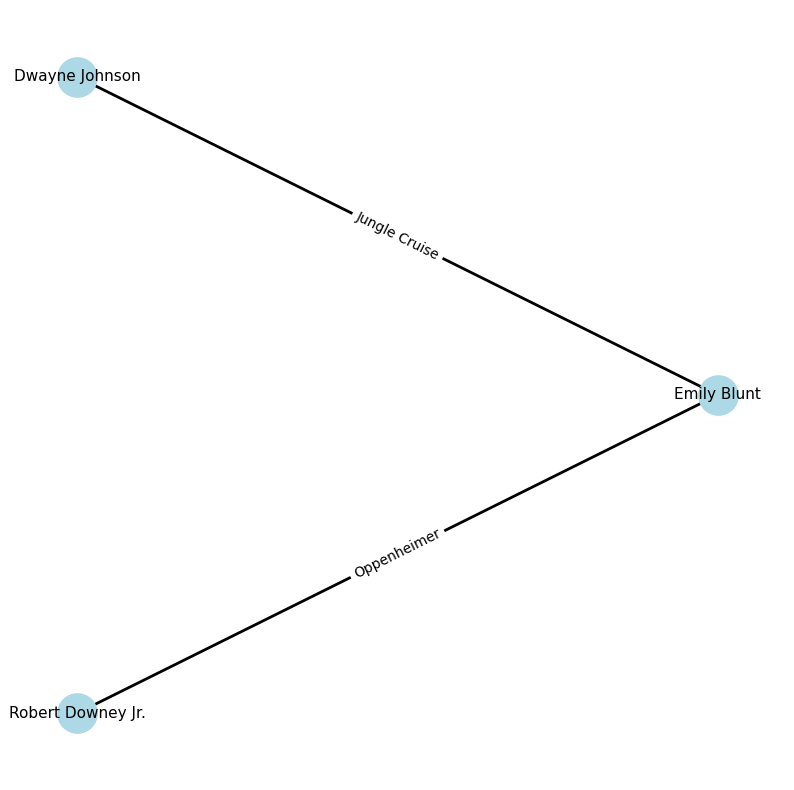

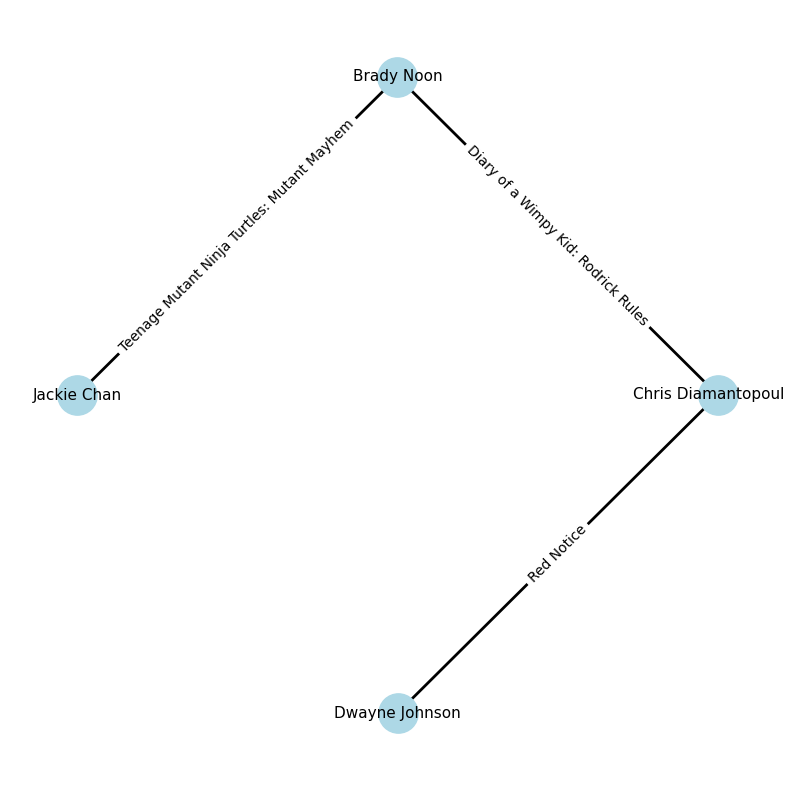

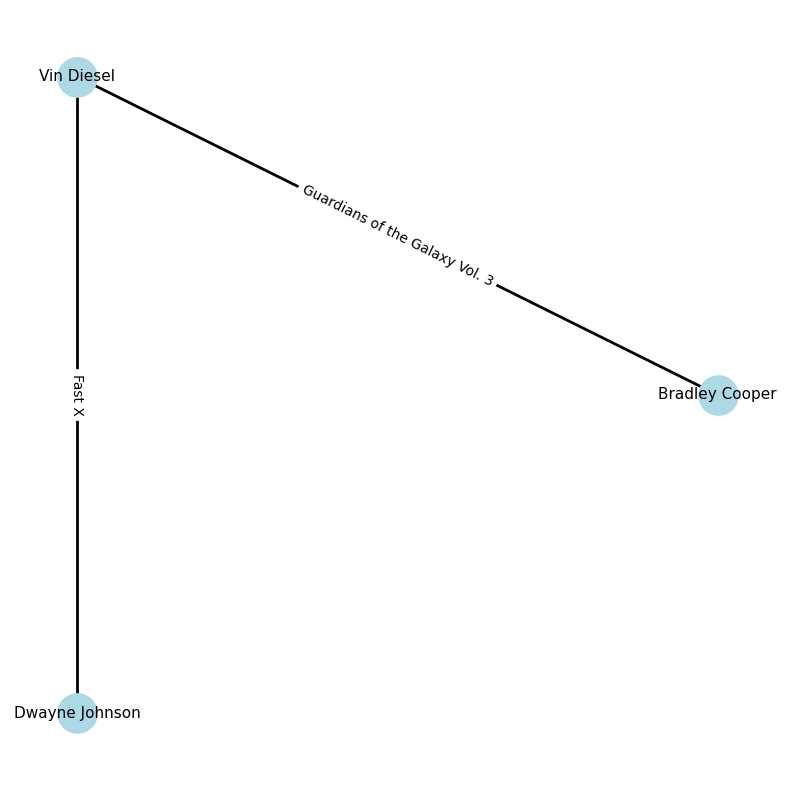

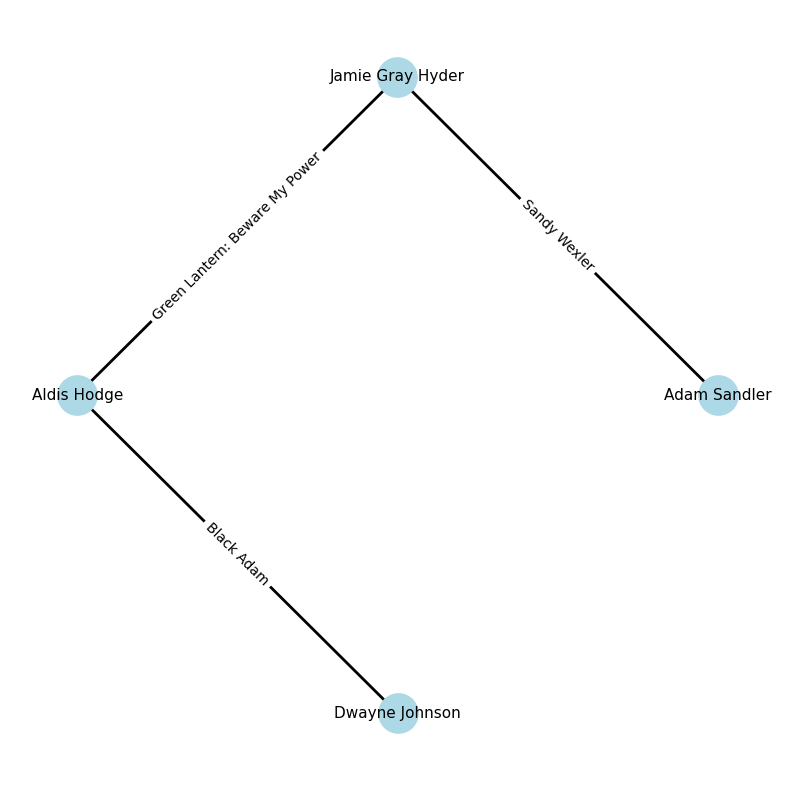

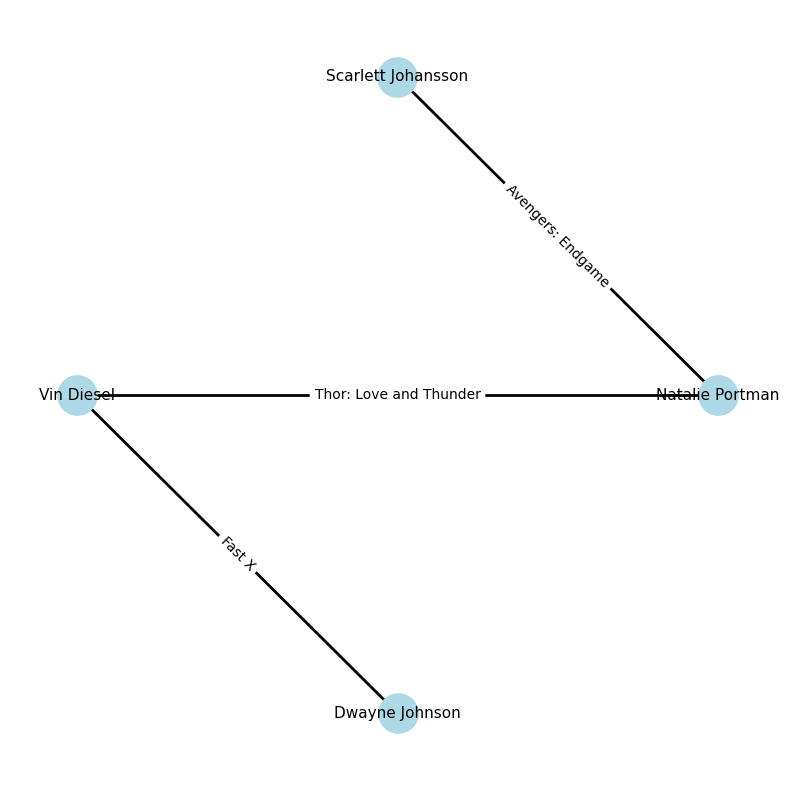

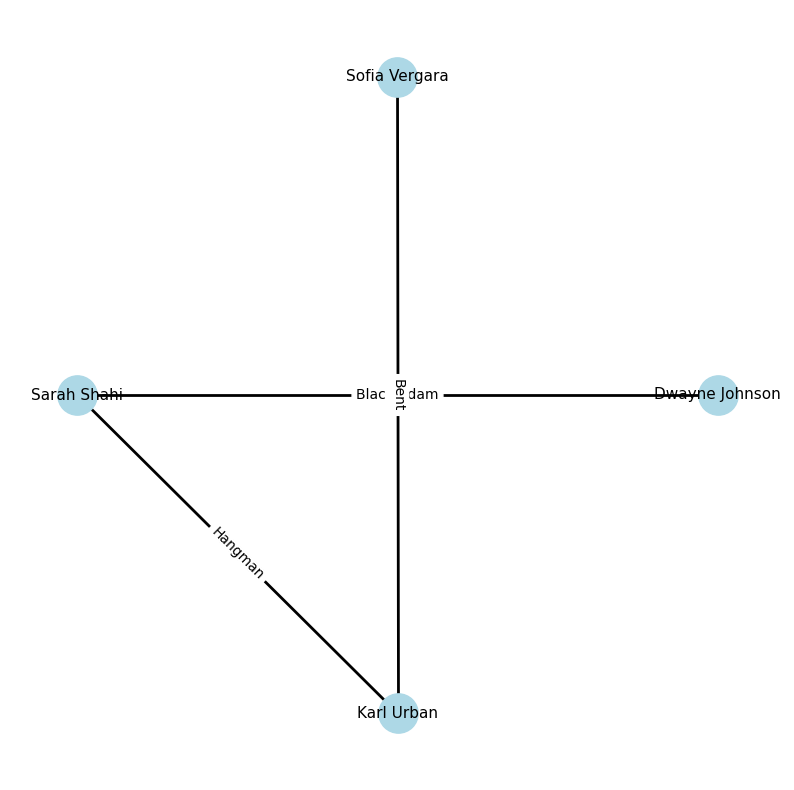

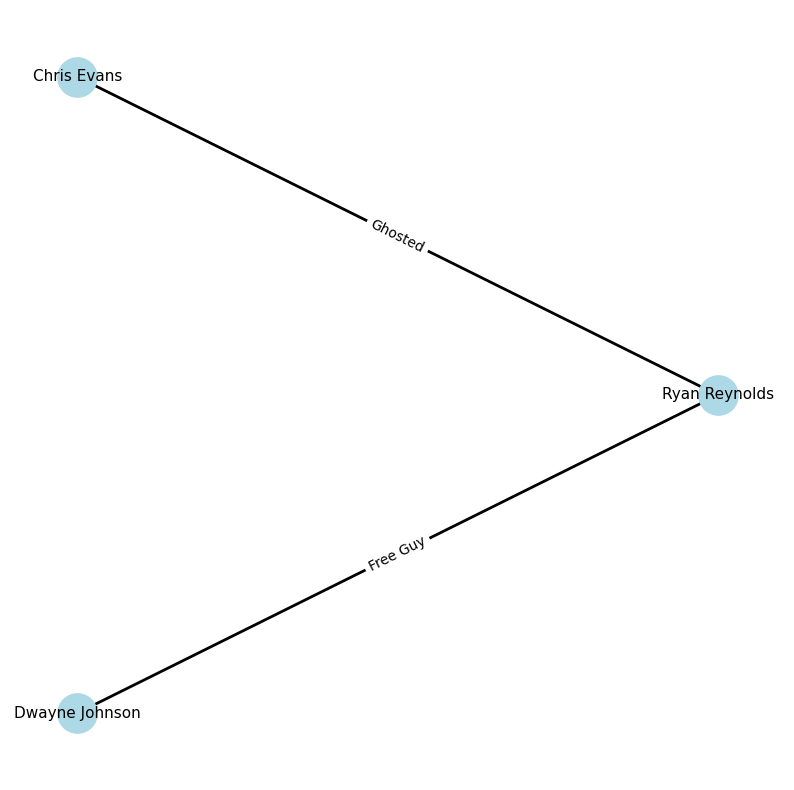

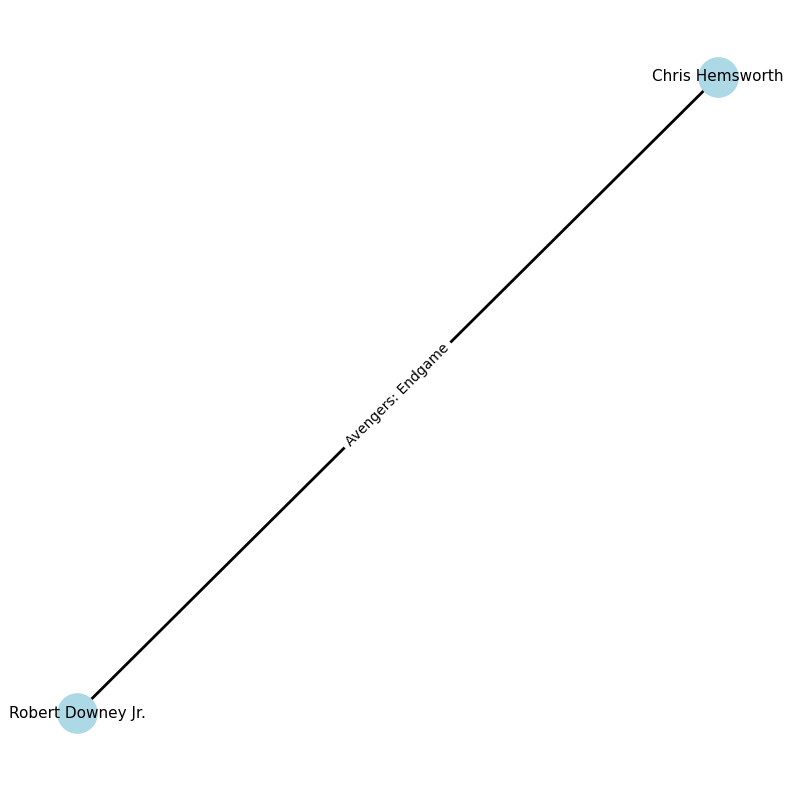

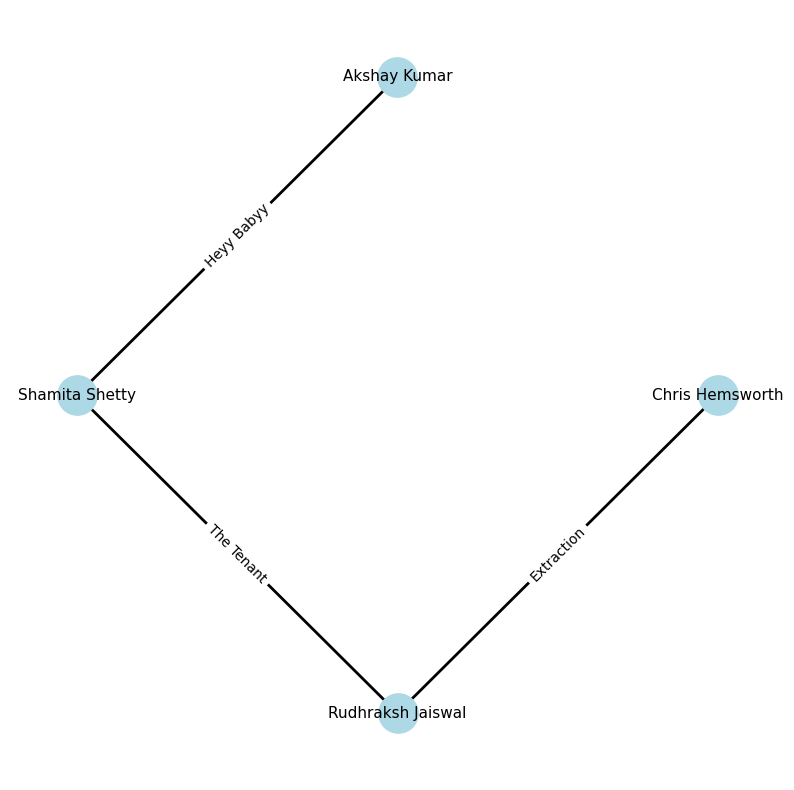

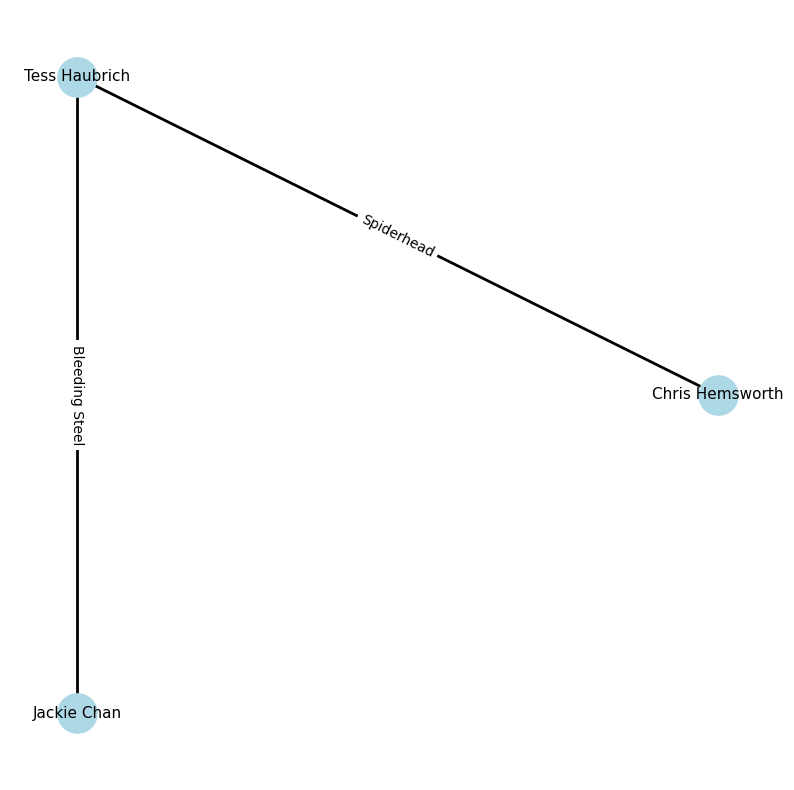

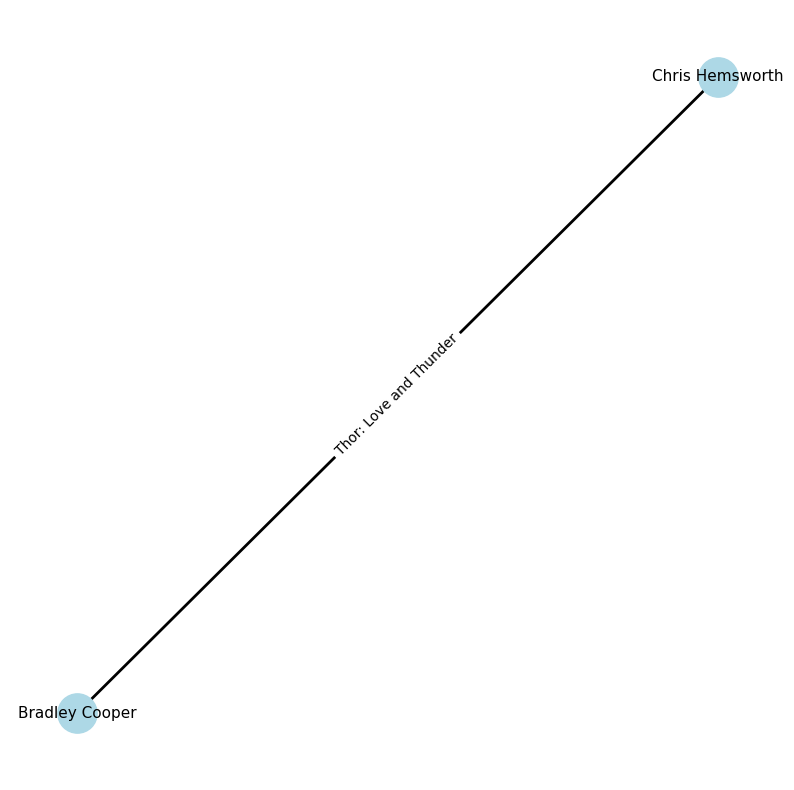

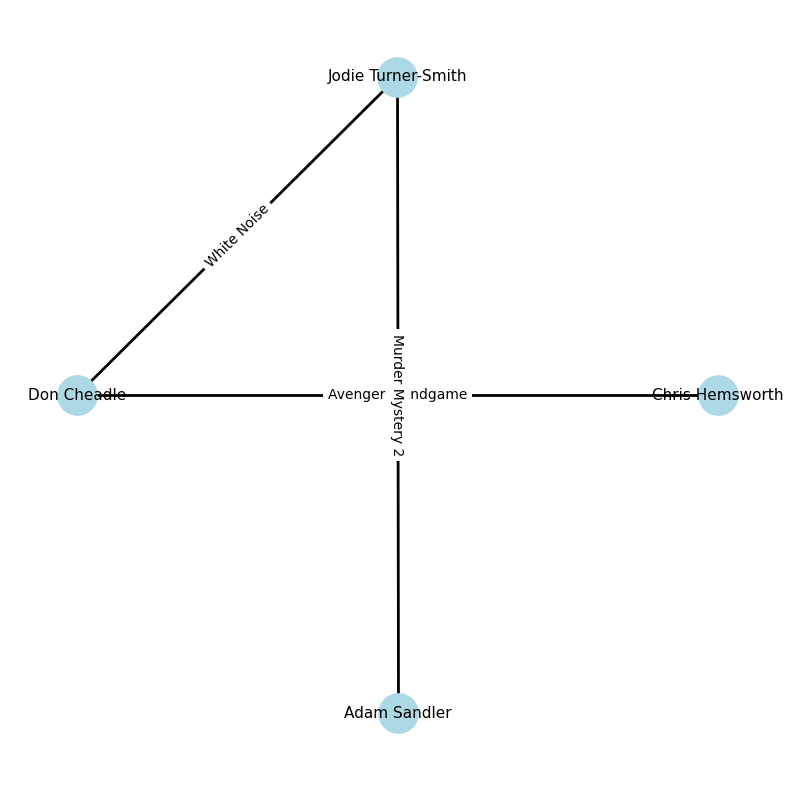

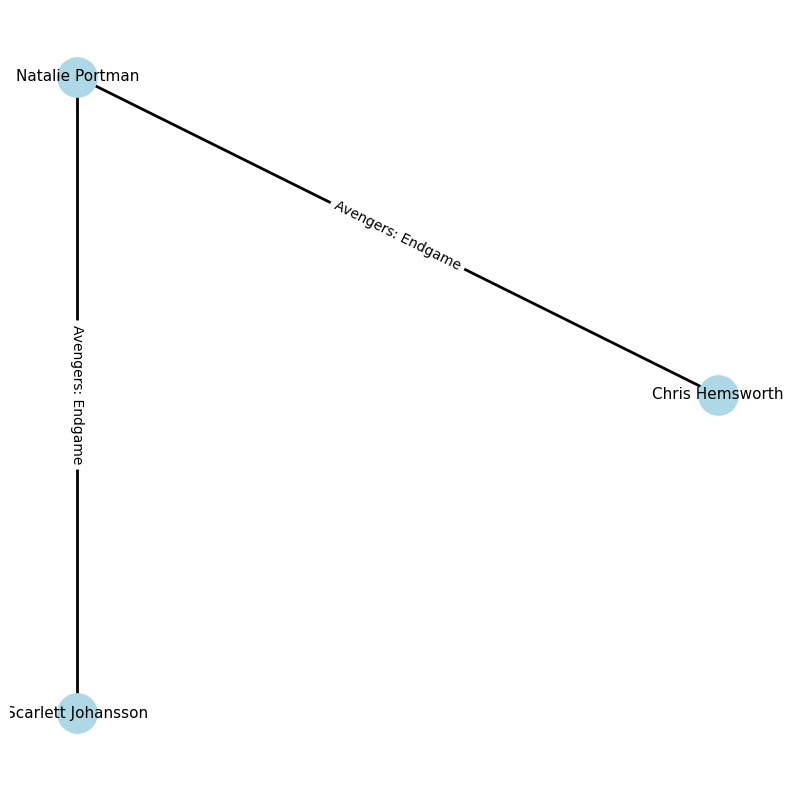

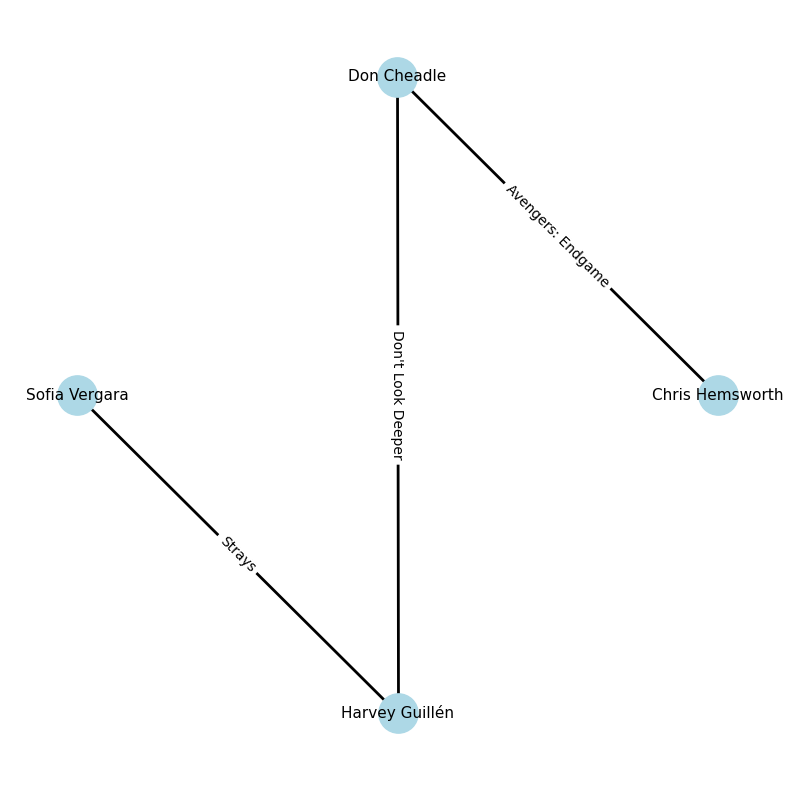

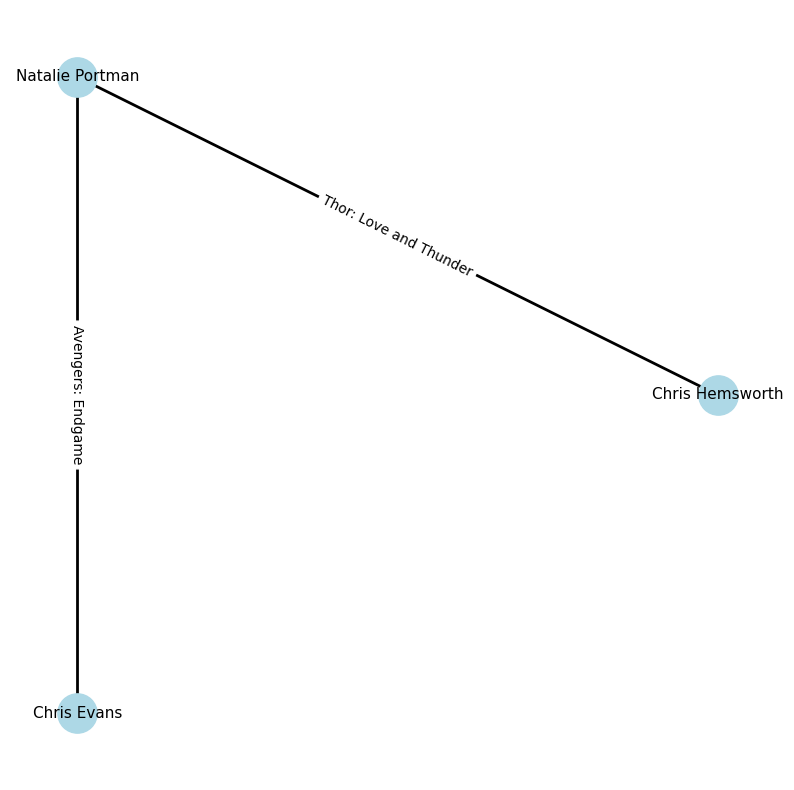

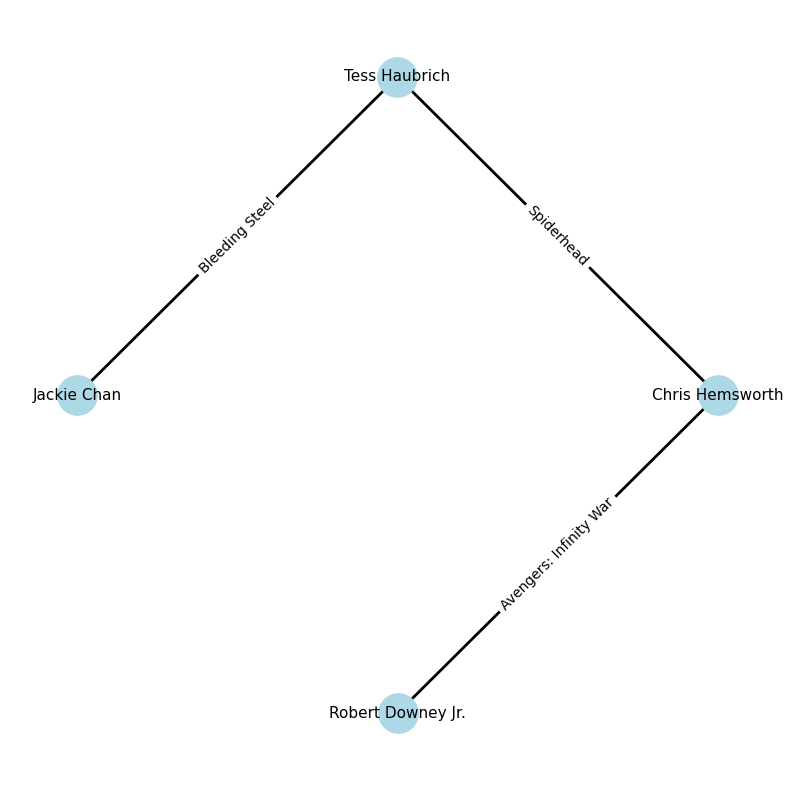

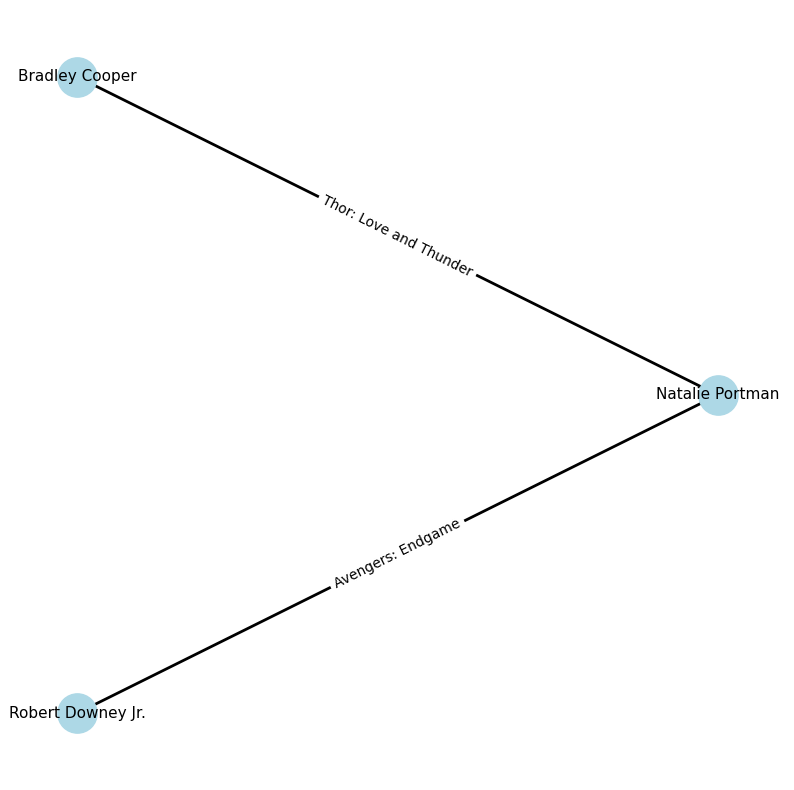

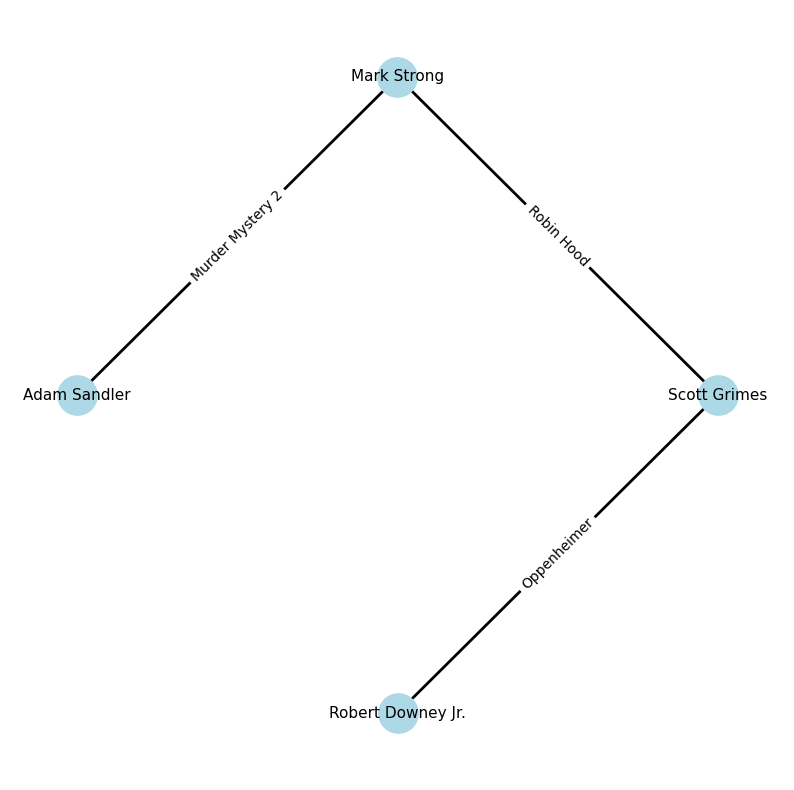

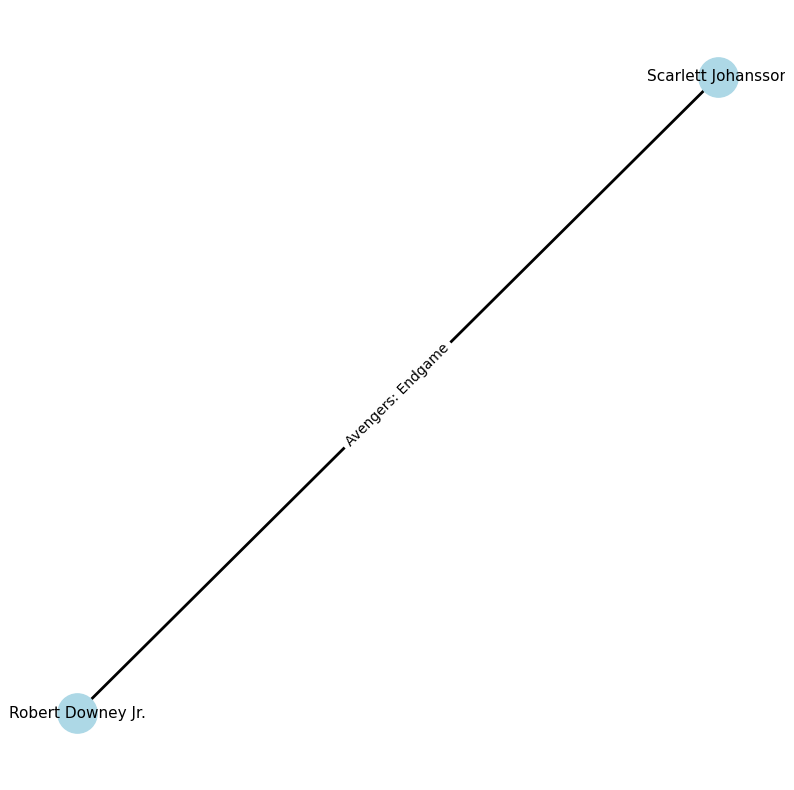

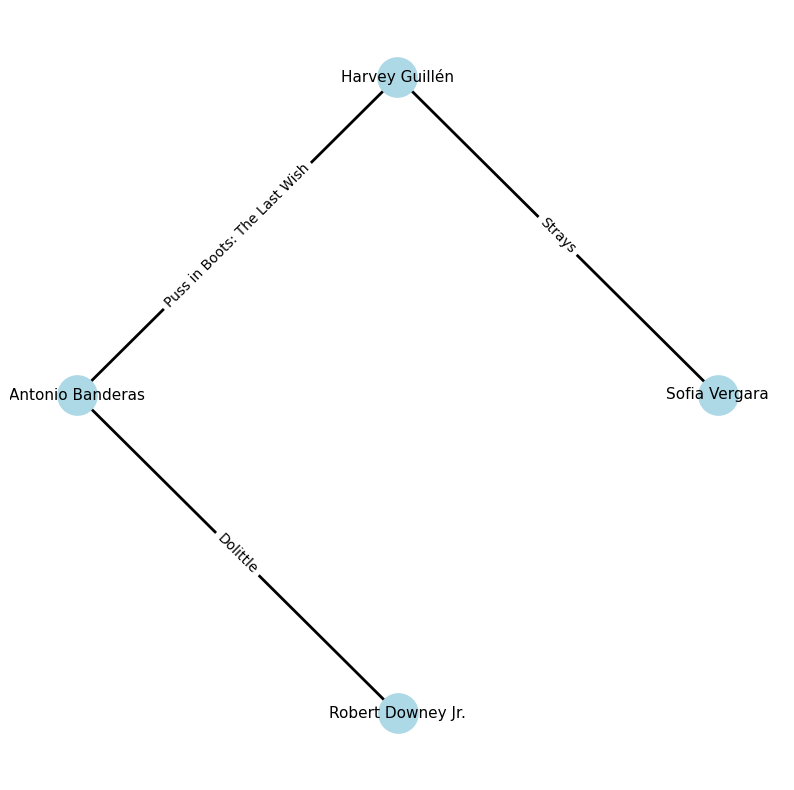

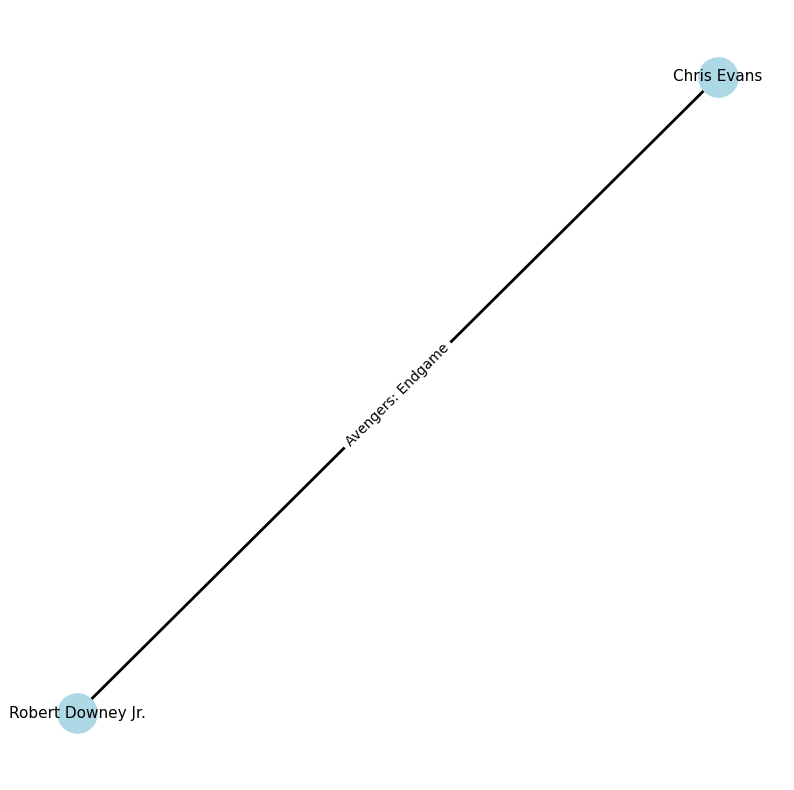

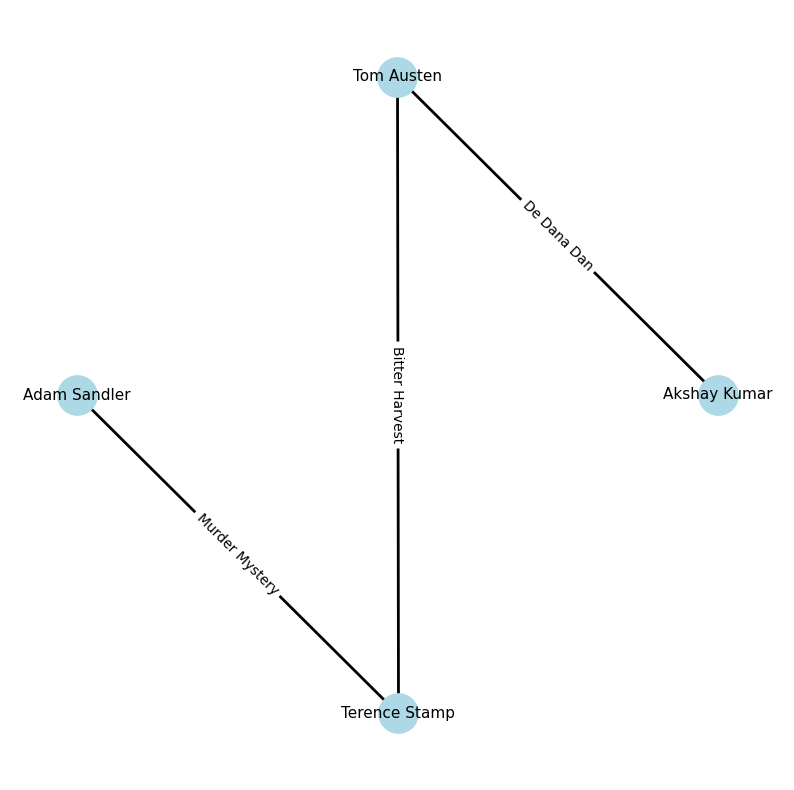

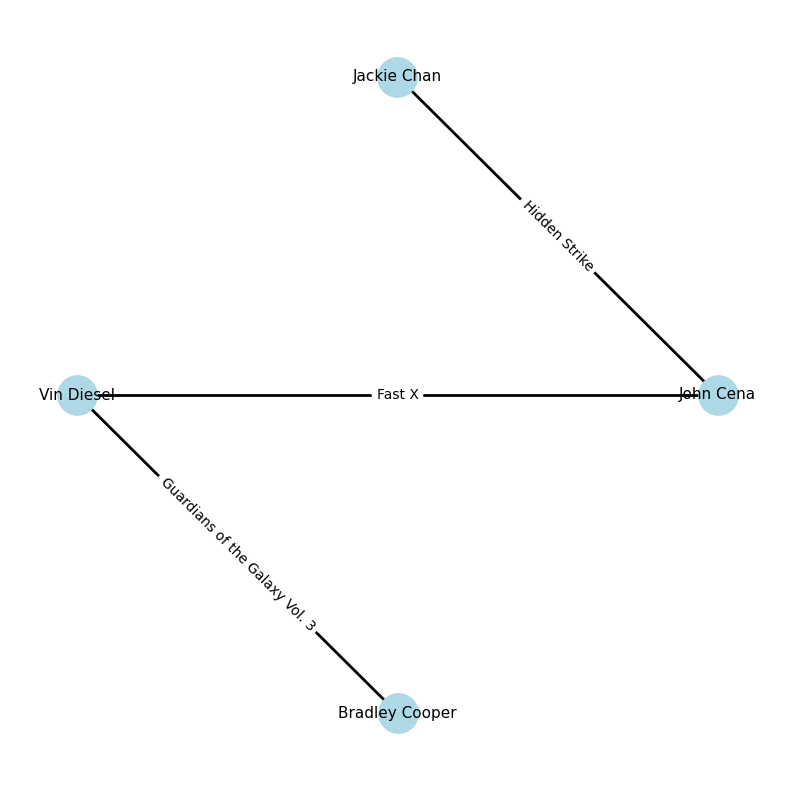

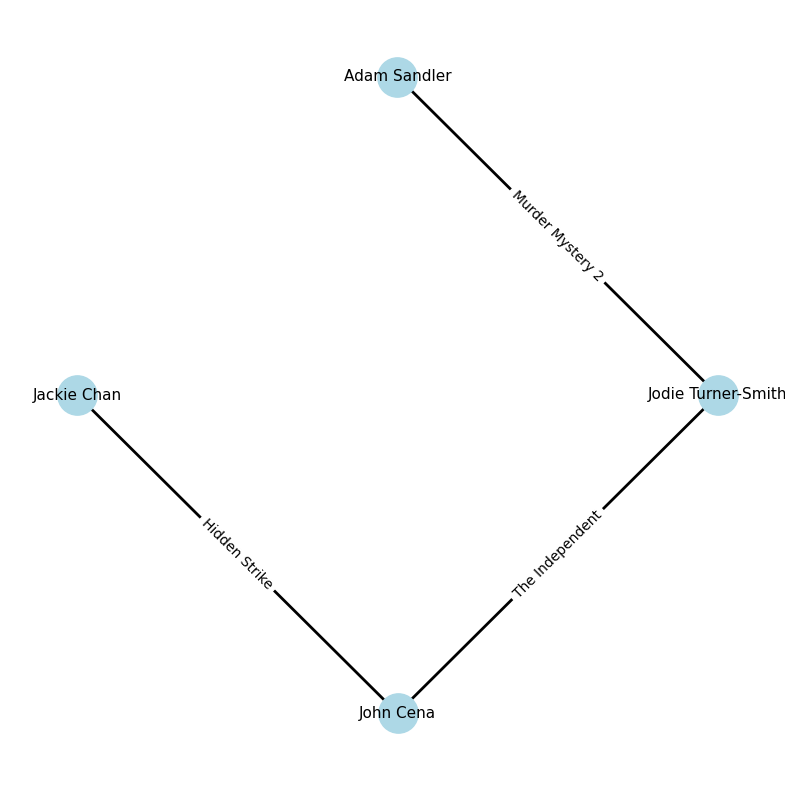

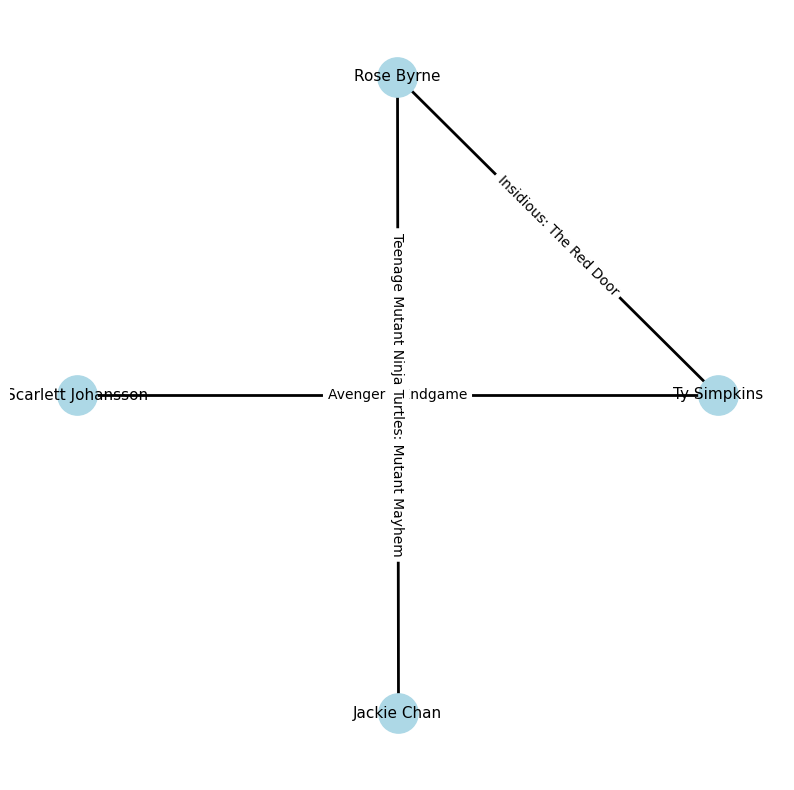

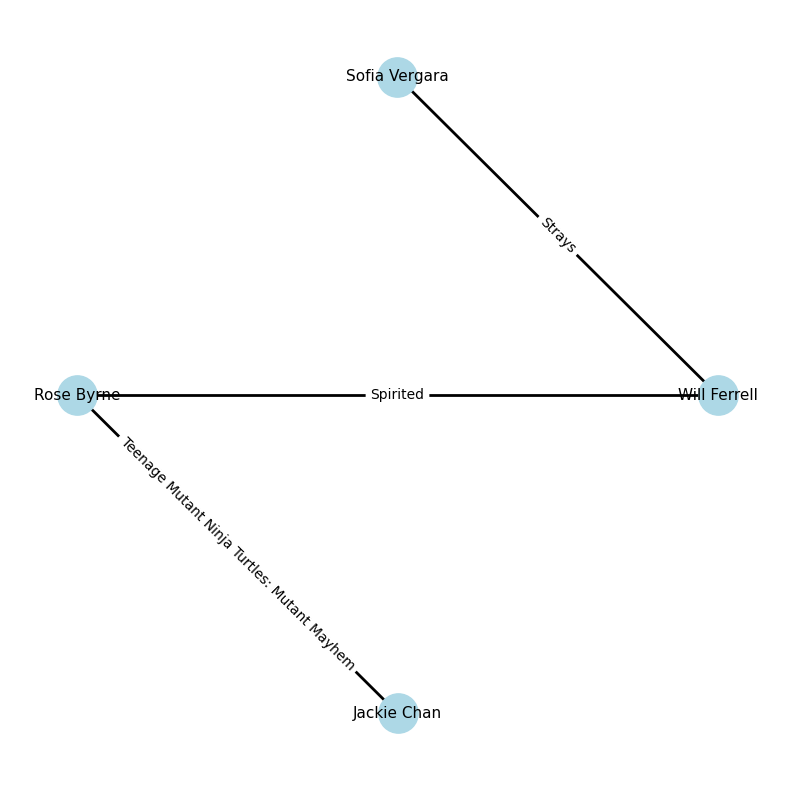

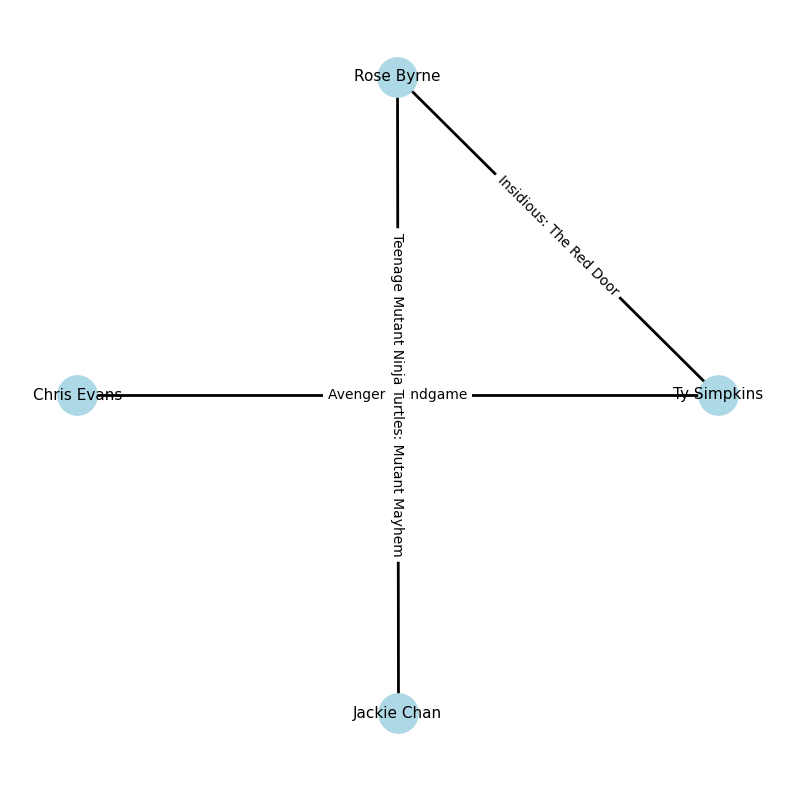

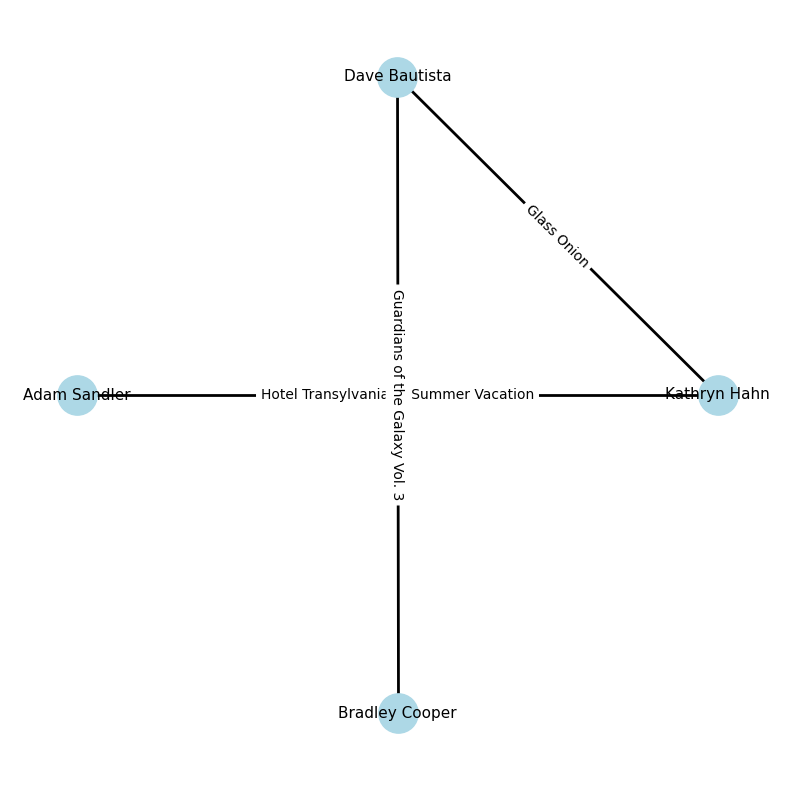

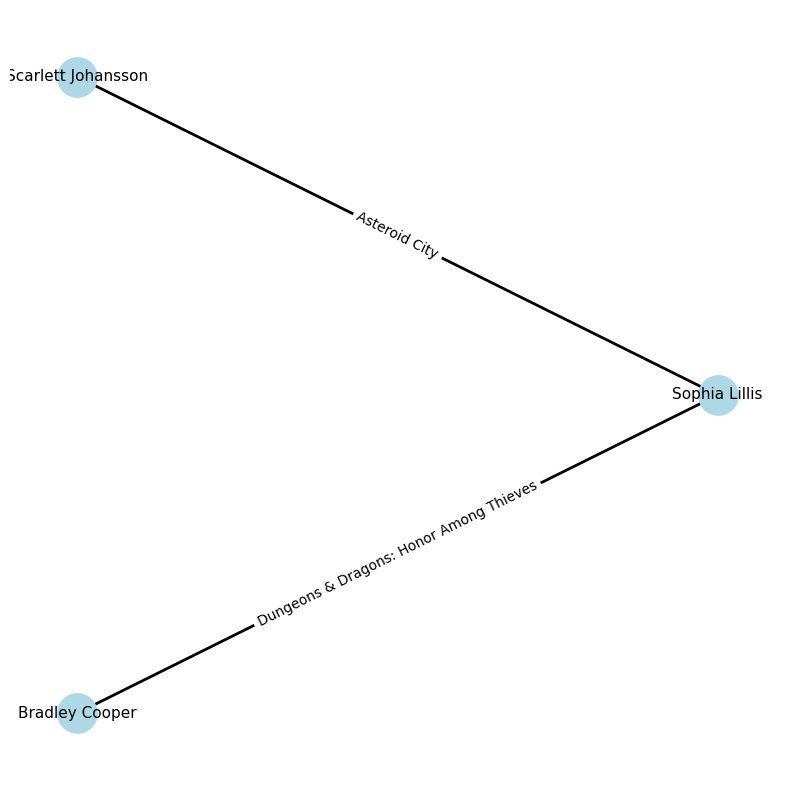

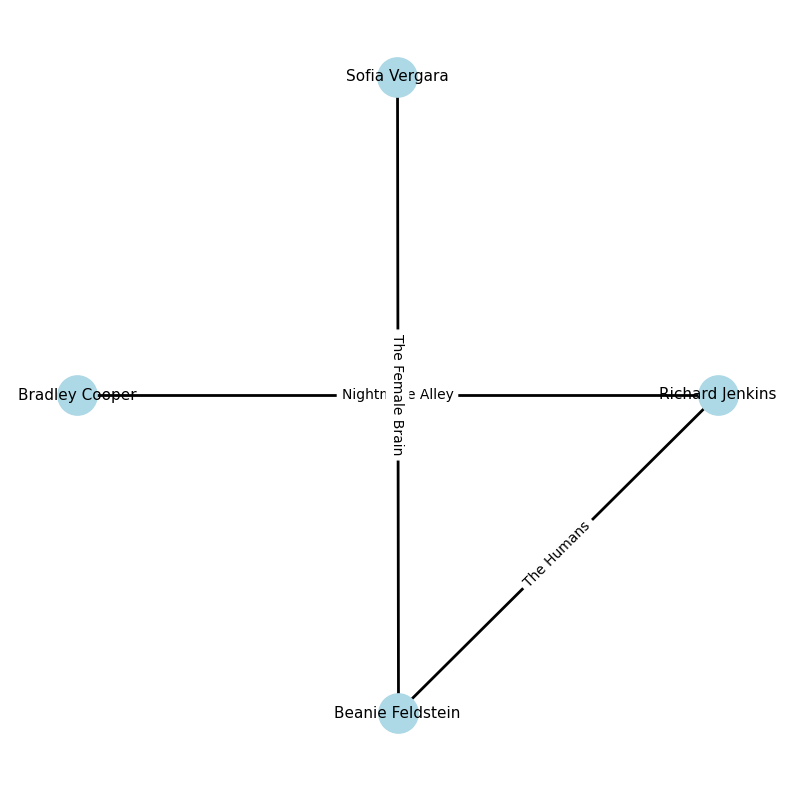

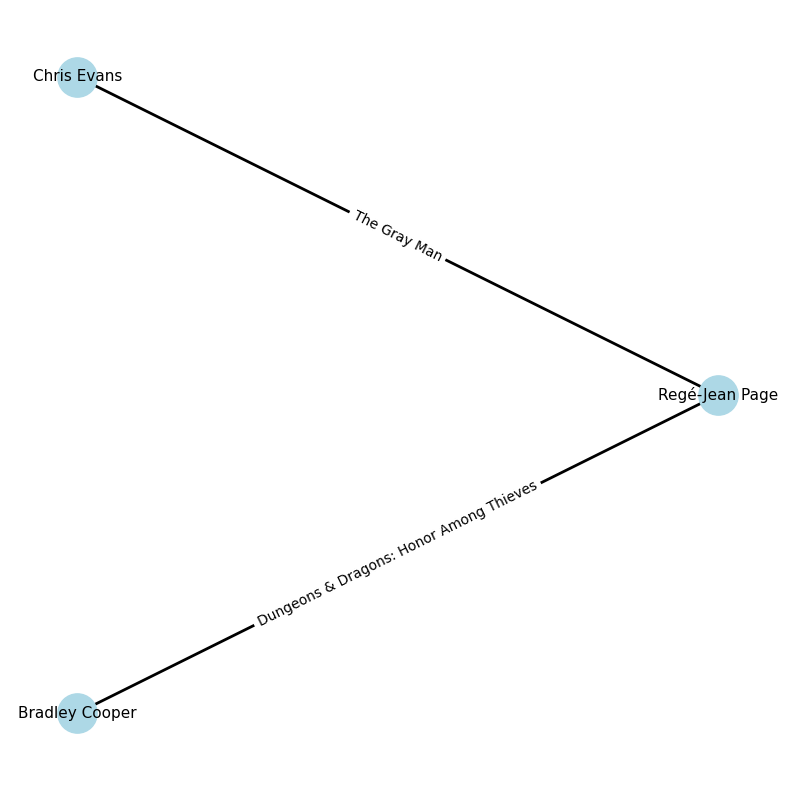

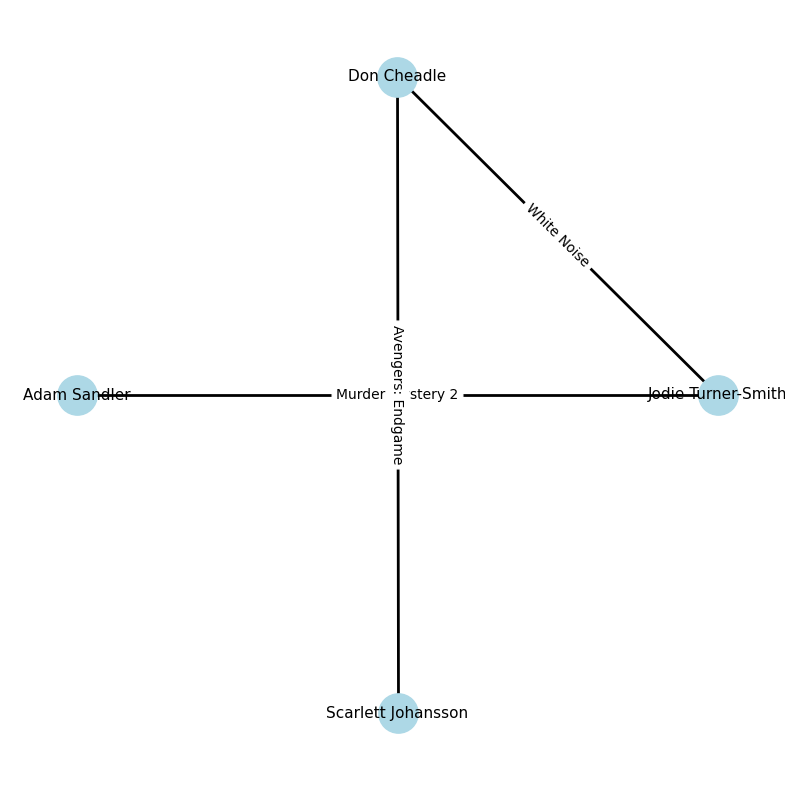

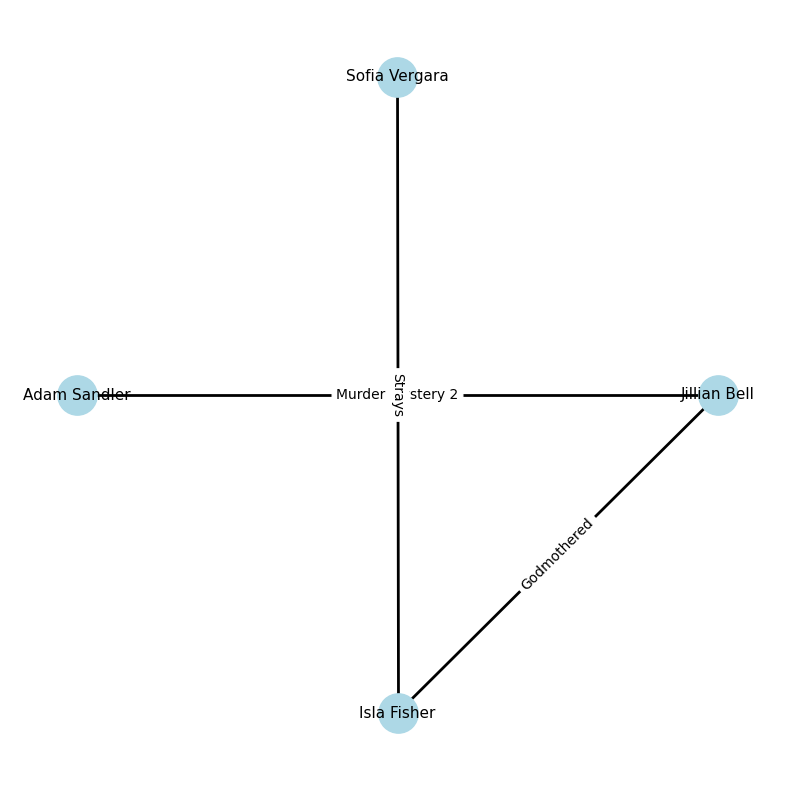

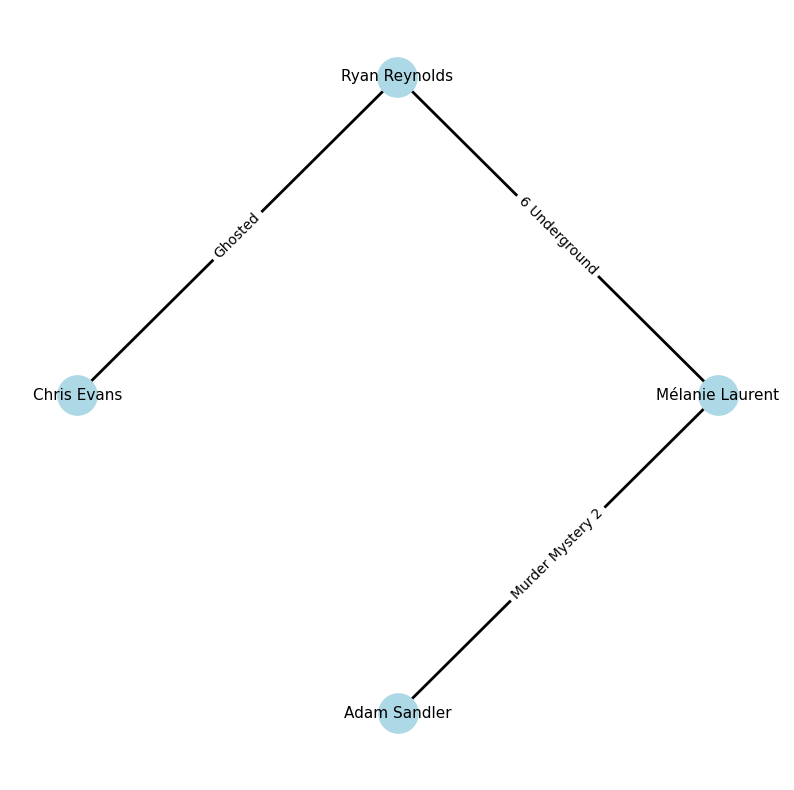

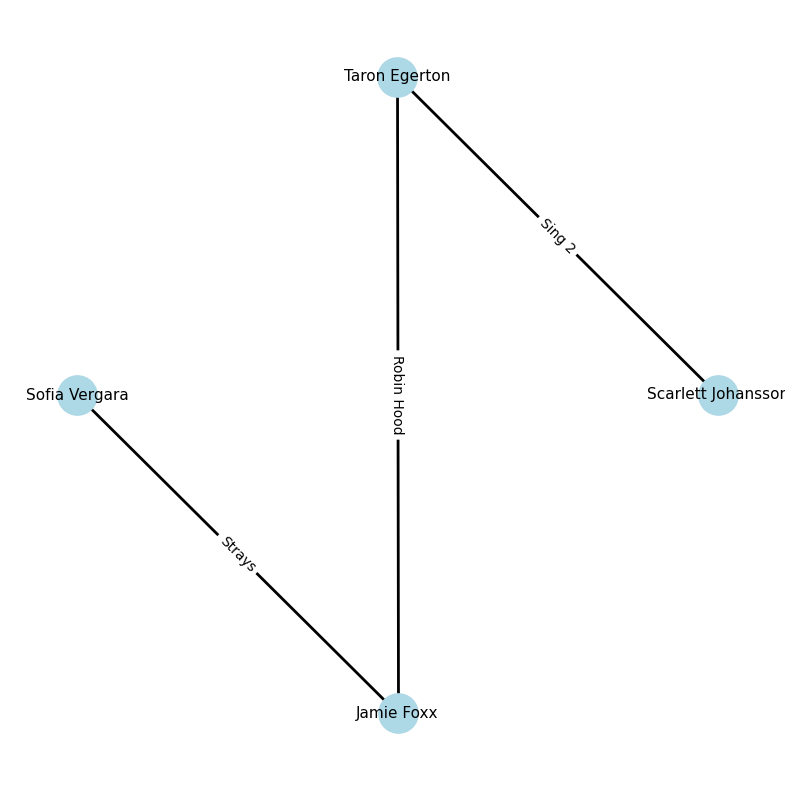

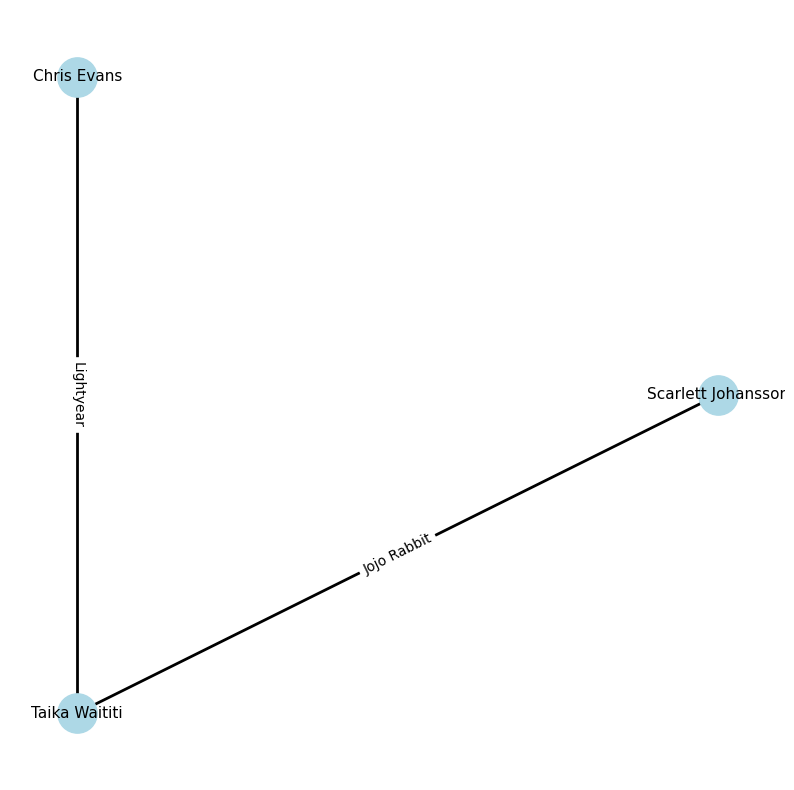

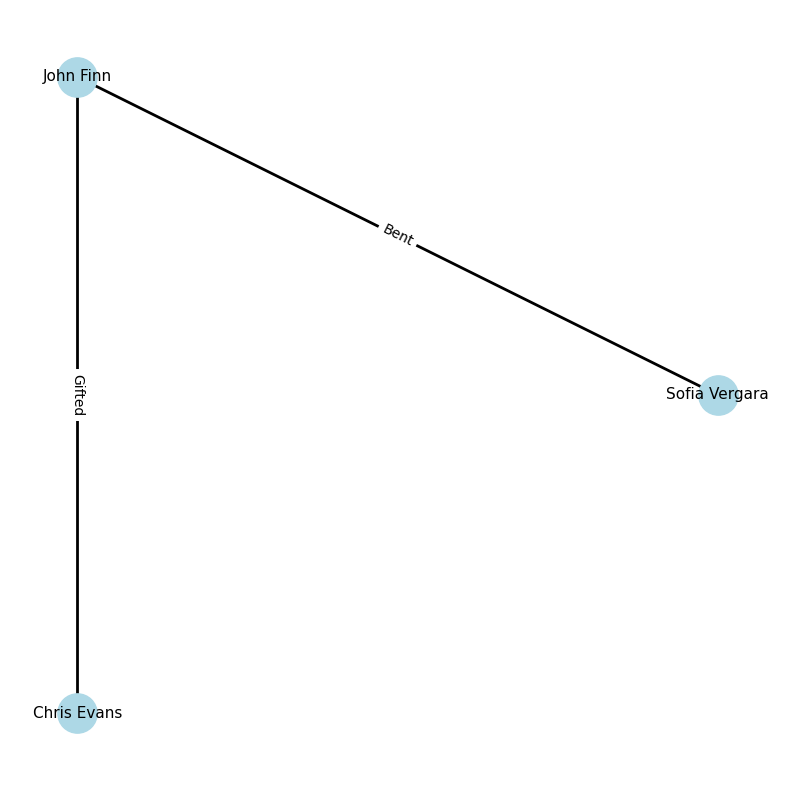

In [37]:
for idx, row in distances_connected.iterrows():
    path_plotting(triplets[idx], row[0], row[2])